# Projet : étude sociologique des élus municipaux 
## LUCAS MAVEAU & CLEMENT VAHE

###### Préambule
Il serait interessant d'utiliser les modules tel folium ou encore matplotlib pour connaitre les distinctions caractéristiques de certains départements en fonction de leurs élus municipaux présents dans chaque communes du département. 

Il est tout d'abord primordial ici de creer une base en intégrant les 4 tables présentes dans le dossier base_france.

On utilise les fichiers departements et professions sans doublons 

In [2]:
import sqlite3 as sq3

#### Création d'une base etude comportant les données des fichiers csv
Il est nécessaire d'éxecuter qu'une seule fois les cellules de création de tables et d'insertions des données car il suffit juste d'une éxecution sinon des doublons seront crées et des bugs vont se produire ; si la base avec les données est crée, plus la peine d'y toucher..

In [3]:
#creation de la base 
connexion = sq3.connect('base_france/etude.db')
curseur = connexion.cursor()

###### le fichier elus

In [ ]:
#creation d'une table vide elus dans la base etude
curseur.execute("""
CREATE TABLE IF NOT EXISTS elus(
    Id INTEGER PRIMARY KEY,
    Code_dpt TEXT, Commune TEXT, Nom_elu TEXT, Prenom_elu TEXT, Sexe TEXT, Date_naissance TEXT, Code_profession INT, Fonction TEXT, Nationalite TEXT
    )
""")

#chargement et lecture du fichier elus.csv
fichier_elus = open('base_france/elus.csv', 'r', encoding = "utf8" )
lignes_elus = fichier_elus.readlines()


# les données du fichier elus sont rassembler dans une liste python de nom data_elus
data_elus = []
for i in range(1, len(lignes_elus)):
    d = lignes_elus[i]
    d = d.replace('\n', '')
    d = d.strip().split(";")
    data_elus.append(d)
    
#insertion du contenu de la liste dans la table elus issue de le base etude 
curseur.executemany("""
    INSERT INTO elus(Id, Code_dpt, Commune, Nom_elu, Prenom_elu, Sexe, Date_naissance, Code_profession, Fonction, Nationalite)
    VALUES(?,?,?,?,?,?,?,?,?,?)""", data_elus)
connexion.commit()


##### le fichier communes

In [ ]:
#creation d'une table vide communes dans la base etude
curseur.execute("""
CREATE TABLE IF NOT EXISTS communes(
    code_commune_INSEE TEXT PRIMARY KEY,
    nom_commune_postal TEXT, code_postal INT, latitude TEXT, longitude TEXT, code_commune INT, code_departement INT, code_region INT, nom_region TEXT
    )
""")

#chargement et lecture du fichier communes.csv
fichier_com = open('base_france/communes.csv', 'r', encoding = "utf8" )
lignes_com = fichier_com.readlines()

#les données du fichier communes sont rassembler dans une liste python de nom data_communes
data_com = []
for i in range(1, len(lignes_com)):
    d = lignes_com[i]
    d = d.replace('\n', '')
    d = d.strip().split(",")
    data_com.append(d)
    
#insertion du contenu de la liste dans la table communes issue de le base etude 
curseur.executemany("""
    INSERT INTO communes(code_commune_INSEE, nom_commune_postal, code_postal, latitude, longitude, code_commune, code_departement, code_region, nom_region)
    VALUES(?,?,?,?,?,?,?,?,?)""", data_com)
connexion.commit()

###### le fichier departements

In [ ]:
#creation d'une table vide departements dans la base etude
curseur.execute("""
CREATE TABLE IF NOT EXISTS departements(
    Code_dpt TEXT PRIMARY KEY,
    Dpt TEXT
    )
""")   

#chargement et lecture du fichier departements.csv
fichier_dpt = open('base_france/departements.csv', 'r', encoding = "utf8" )
lignes_dpt = fichier_dpt.readlines()

#les données du fichier departements sont rassembler dans une liste python de nom data_dpt
data_dpt = []
for i in range(1, len(lignes_dpt)):
    d = lignes_dpt[i]
    d = d.replace('\n', '')
    d = d.strip().split(";")
    data_dpt.append(d)
    
#insertion du contenu de la liste dans la table departements issue de le base etude 
curseur.executemany("""
    INSERT INTO departements(Code_dpt, Dpt)
    VALUES(?,?)""", data_dpt)
connexion.commit()

###### le fichier profession

In [ ]:
#creation d'une table vide professions dans la base etude
curseur.execute("""
CREATE TABLE IF NOT EXISTS professions(
    Code_profession INTEGER PRIMARY KEY,
    Profession TEXT
    )
""") 

#chargement et lecture du fichier professions.csv
fichier_prof = open('base_france/professions.csv', 'r', encoding = "utf8" )
lignes_prof = fichier_prof.readlines()

#les données du fichier professions sont rassembler dans une liste python de nom data_prof
data_prof = []
for i in range(1, len(lignes_prof)):
    d = lignes_prof[i]
    d = d.replace('\n', '')
    d = d.strip().split(";")
    data_prof.append(d)

#insertion du contenu de la liste dans la table professions issue de le base etude 
curseur.executemany("""
    INSERT INTO professions(Code_profession, Profession)
    VALUES(?,?)""", data_prof)
connexion.commit()

In [ ]:
#deconnexion à la base
curseur.close()
connexion.close()

### Etude sociologique des elus
Nous allons utiliser le module matplotlib et le module folium que nous allons importer ci-dessous pour visualiser graphiquement nos différentes études.
Nous allons également nous reconnecter 

In [3]:
!pip install folium

In [4]:
#chargement de matplotlib 
from matplotlib import pyplot as plt
#chargement de folium
import folium
#on importe le module math (pour les besoins des études)
import math

In [5]:
#connexion à la base
connexion = sq3.connect('base_france/etude.db')
curseur = connexion.cursor()

NameError: name 'sq3' is not defined

In [8]:
def contenu_curseur(requete, L = []):
    """
    renvoie le résultat de la requete
    """
    L = []
    curseur.execute(requete)
    for i in curseur:
        L.append(i[0])
    return L

In [9]:
def in_L(L):
    """
    renvoie le nombre (int) de la liste du résultat de la requete
    """
    return L[0]

In [10]:
def show_figure(x1, labels1):
    """
    affiche le graphique correspondant aux requetes
    """
    plt.figure(figsize = (7, 8))
    plt.pie(x = x1, labels = labels1,
           autopct = lambda x: str(round(x)),)
    plt.legend()
    plt.show()

#### part des elus femme/homme

In [11]:
def part_h_f():
    """
    affiche le diagramme de la part des elus masculin et feminin 
    """
    nbr_elus = in_L(contenu_curseur("SELECT COUNT(Id) FROM elus"))
    nbr_elusF = in_L(contenu_curseur("SELECT COUNT(Id) FROM elus WHERE Sexe = 'F'"))
    nbr_elusH = in_L(contenu_curseur("SELECT COUNT(Id) FROM elus WHERE Sexe = 'M'"))
    show_figure([nbr_elusF / nbr_elus, nbr_elusH / nbr_elus], ["FEMME", "HOMME"])

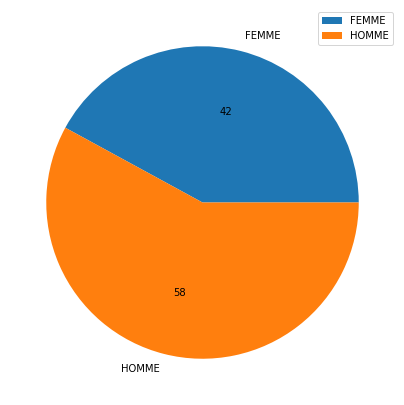

In [12]:
part_h_f()

#### part elus de différentes nationalités 

In [13]:
def elus_nationalite():
    """
    affiche le diagramme des parts des différentes nationalitées selon les elus
    """
    toutes_natio = contenu_curseur("SELECT DISTINCT Nationalite FROM elus")
    nbr_elus = in_L(contenu_curseur('SELECT COUNT(Id) FROM elus'))
    x1 = []
    for natio in toutes_natio:
        x1 += [(in_L(contenu_curseur("SELECT COUNT(Id) FROM elus WHERE Nationalite LIKE"  + '"' + natio + '"')) / nbr_elus)] 
    show_figure(x1, toutes_natio)

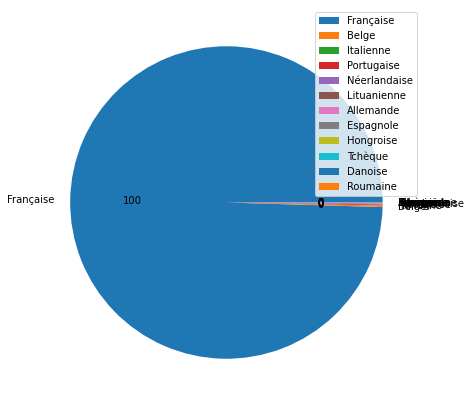

In [14]:
elus_nationalite()

#### part des elus slon leur categorie age

In [15]:
def elus_categorie_age():
    """
    affiche le diagramme de la part des elus selon leur catégorie d'age
    """
    all_dates_naissance = contenu_curseur("SELECT Date_naissance FROM elus")
    all_dates = []
    for date in all_dates_naissance:
        all_dates.append(2020 - int(date[6: ]))
    max_age = max(all_dates)
    min_age = min(all_dates)
    #on connait désormais l'élus le plus vieux et le plus jeune
    tot_plus_65ans = 0
    for i in range(max_age - 64):
        tot_plus_65ans += in_L(contenu_curseur("SELECT COUNT(Id) FROM elus WHERE Date_naissance LIKE " + '"' + '%' + str(i+65) + '"'))
    tot_moins_30ans = 0
    for i in range(30 - min_age + 1):
        tot_moins_30ans += in_L(contenu_curseur("SELECT COUNT(Id) FROM elus WHERE Date_naissance LIKE " \
        + '"' + '%' + str(2020 - min_age - i)  + '"'))
    nbr_elus = in_L(contenu_curseur("SELECT COUNT(Id) FROM elus"))
    show_figure([tot_moins_30ans / nbr_elus, (nbr_elus - (tot_moins_30ans + tot_plus_65ans)) / nbr_elus,\
                 tot_plus_65ans / nbr_elus], ['Jeune(18-30 ans)', 'Adulte(31-64 ans)', 'Retraité(+ 65 ans)'])

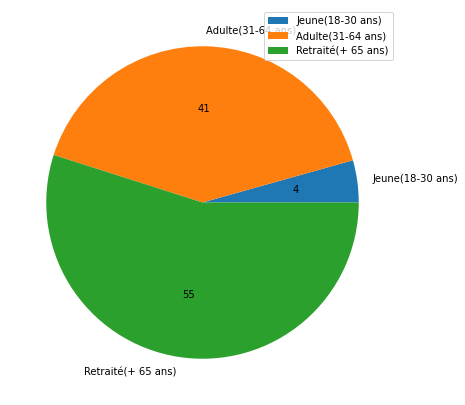

In [16]:
elus_categorie_age()

#### part des elus dans l'ancienne région nord-pas-de-calais

In [17]:
def elus_n_pdc():
    """
    affiche le diagramme de la part des elus dans les departements du Nord et du Pas de calais
    """
    elus_n = in_L(contenu_curseur("SELECT COUNT(Id) FROM elus WHERE Code_dpt = '59'"))
    elus_pdc = in_L(contenu_curseur("SELECT COUNT(Id) FROM elus WHERE Code_dpt = '62'"))
    elus_n_pdc = elus_n + elus_pdc
    show_figure([elus_n / elus_n_pdc, elus_pdc / elus_n_pdc], ["NORD", "PAS-DE-CALAIS"])

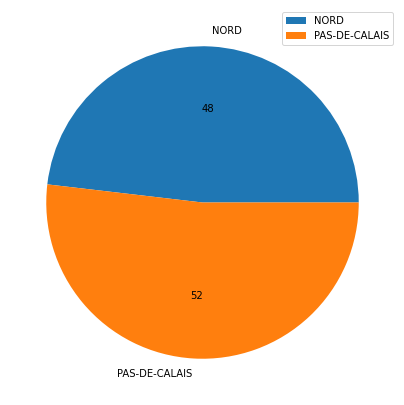

In [18]:
elus_n_pdc()

#### part des elus de la region hauts de france

In [19]:
def elus_hdf():
    """
    affiche le diagramme de la part des elus selon les départements dans la région hauts de france
    """
    code_dpt = contenu_curseur("SELECT DISTINCT code_departement FROM communes WHERE nom_region LIKE 'Hauts-de-France'")
    nbr_elus_dpt = []
    nom_dpt = []
    for dpt in code_dpt:
        nom_dpt += contenu_curseur('SELECT Dpt FROM departements WHERE Code_dpt = ' + "'" + str(dpt) +  "'")
        nbr_elus_dpt += contenu_curseur('SELECT COUNT(Id) FROM elus WHERE Code_dpt = ' + "'" + str(dpt) + "'")
    tot = 0
    for nbr in nbr_elus_dpt:
        tot += nbr
    x1 = []
    for nbr_elus in nbr_elus_dpt:
        x1 += [nbr_elus / tot]
    show_figure(x1, nom_dpt)

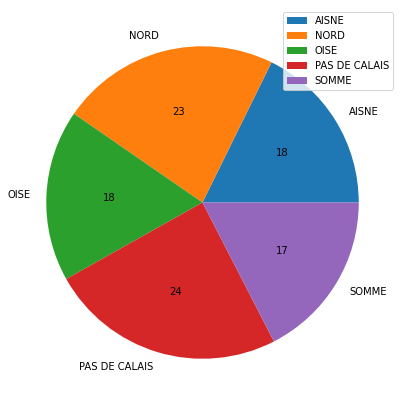

In [20]:
elus_hdf()

#### les 5 métiers les plus représentés parmi les élus

In [21]:
def les_5_metiers_les_plus_presentés():
    """
    affiche le digramme des 5 métiers les plus représentés
    """
    nbr_profession = in_L(contenu_curseur("SELECT COUNT(Code_profession) FROM professions"))
    dico = {}
    for i in range(1, nbr_profession + 1):
        nbr_elus_prof = in_L(contenu_curseur('SELECT COUNT(Id)  FROM elus INNER JOIN professions ON \
        professions.Code_profession = elus.Code_profession WHERE elus.Code_profession = ' + str(i)))
        profession = contenu_curseur('SELECT profession FROM professions WHERE Code_profession = ' + str(i))
        dico[nbr_elus_prof] = profession
    labels1 = []
    x1 = []
    tot = 0
    for i in range(5):
        x1.append(max(dico))
        tot += max(dico)
        max1 = dico.pop(max(dico))
        labels1.append(max1)
        
    show_figure(x1, labels1)

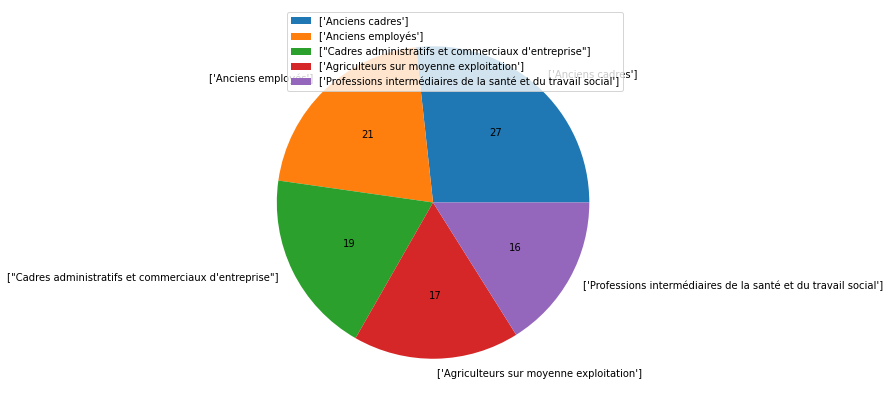

In [22]:
les_5_metiers_les_plus_presentés()
#les données en pourcentage ne valent rien mais classe les 5 métiers les plus représentés par ordre décroissant

#### Part des élus minicipaux retraités

In [23]:
def part_retraités() :
    '''
    affiche la part des élus municipaux retaités
    '''
    nb_retraites = in_L(contenu_curseur('SELECT COUNT(Code_profession) FROM elus WHERE \
    code_profession = 85\
    or code_profession = 86\
    or code_profession = 158\
    or code_profession = 159\
    or code_profession = 160\
    or code_profession = 161\
    or code_profession = 162\
    or code_profession = 163\
    or code_profession = 164\
    or code_profession = 165'))
    nb_total = in_L(contenu_curseur('SELECT COUNT(Id) FROM elus'))
    
    nbrs = [nb_retraites] + [nb_total]
    labels = ['Part des retraités'] + ['Part des travailleurs']
    show_figure(nbrs, labels)

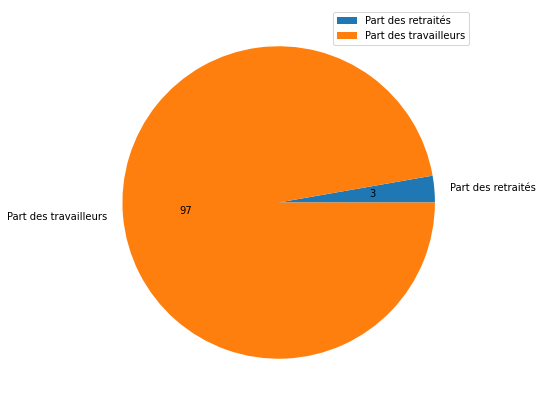

In [24]:
part_retraités()